In [1]:
import numpy as np
import scipy
import imageio as iio
import matplotlib.pyplot as plt

In [2]:
# Load images
ifootball = iio.imread('football.bmp')
ihestain = iio.imread('hestain.bmp')
ibeer = iio.imread('beer.jpg')

## Inputs
* pixels: the input image representation. Each row corresponds to a data point (i.e. a pixel), the 3 columns correspond to R, G, and B values, respectively. Each component has an integer value between 0-255. The number of rows will be the total number of pixels in the image (e.g. for hestain, this would be 224*298 = 66752)
* k: the desired number of clusters (in this case, will be either 2, 4, or 8)

## Outputs
* class: cluster assignment of each data point in pixels. The assignment should be an integer in the range 1 to k, and the output should be a column vector size(pixels, 1) elements
* centroid: location of k centroids in the result. With images, each centroid corresponds to the representative color of each cluster. The output should be a matrix with k rows and 3 columns with values in the range [0, 255] (floating point possible)

## Procedure
* Initialize k centroids at random
* Assign each data point (pixel) to one of the clusters by calculating the 2-norm distance from the point to each of the centroids and taking the one with the minimum distance
* Adjust the centroid locations by taking the average of the data points in each centroid (i.e. sum up the points and divide by the number of points) - if there is an empty cluster, remove it before going to the next iteration
* Continue iterating until the centroids stop changing (calculate the 2-norm of the difference between the old centroids and the new centroids, terminate the loop when this drops below a set threshold)

In [3]:
def kmeans(pixels, k):
    # pixels: the input image representation
    # k: the desired number of clusters
    
    # Reshape pixels matrix
    m = pixels.shape[0] * pixels.shape[1]
    mpixels = np.reshape(pixels,(m,3)).T
    
    # Randomly initialize k centroids
    centroid = np.random.randint(256, size=(3,k))
    c_old = np.copy(centroid) + 10
    
    n_iter = 0 # Track number of iterations
    
    while np.linalg.norm(centroid - c_old, ord='fro') > 1e-6:
        # Assign each data point to a centroid
        c2 = np.sum(np.power(centroid,2), axis=0, keepdims=True)
        diff = -2*np.dot(mpixels.T, centroid) + c2
        labels = np.argmin(diff, axis=1)
            
        # Adjust the centroid locations
        c_old = np.copy(centroid)
        bEmpty = False # Boolean for tracking whether any clusters are empty
        
        for c in range(centroid.shape[1]):
            count = np.count_nonzero(labels == c)
            if count == 0:
                bEmpty = True
                continue
            avg = np.mean(mpixels.T[labels == c], axis=0)
            centroid[:,c] = avg
            
        if bEmpty:
            # Find the empty clusters
            c_empty = np.delete(np.arange(0,k,1),np.unique(labels))
            # Remove the centroids and recalculate k
            centroid = np.delete(centroid, c_empty, axis=1)
            c_old = np.delete(c_old, c_empty, axis=1)
            k = centroid.shape[1]
        
        n_iter += 1
    
    return labels, centroid, n_iter
        

In [4]:
# Run kmeans algorithm
labels, centroid, n_iter = kmeans(ifootball, 8)
compressed_image = np.reshape(centroid[:,labels].T,ifootball.shape)

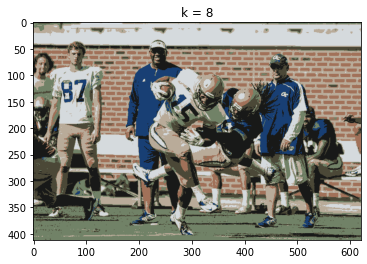

In [5]:
# Show compressed image
plt.title('k = 8')
plt.imshow(compressed_image)

In [6]:
# Record # of iterations required for convergence and time to run over 100 trials
import timeit

iterations = []
time = []

for i in range(100):
    t0 = timeit.default_timer()
    labels, centroid, n_iter = kmeans(ibeer, 8)
    t1 = timeit.default_timer()
    iterations.append(n_iter)
    time.append(t1-t0)

In [7]:
np.mean(iterations)

32.04